# Import Packages and Test URL

In [1]:
#import packages
from bs4 import BeautifulSoup
import urllib
import urllib.request
import re
import pandas as pd
import numpy as np
import os
from datetime import datetime
import requests
import csv
import textblob
import matplotlib.pyplot as plt
import seaborn as sns


headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36"}

url = "https://forums.hardwarezone.com.sg/eat-drink-man-woman-16/%5Bbionix-accident%5D-second-photo-accident-leaked-5931722.html"


for i in url:
    thread_url = url.format(i)
    print(thread_url)
    
resp = requests.get (thread_url, headers=headers)
content = resp.text
soup = BeautifulSoup(content, "lxml")
letters = soup.find_all("div", attrs={"id": re.compile ("^post_message_\d+")})
print (letters)

https://forums.hardwarezone.com.sg/eat-drink-man-woman-16/%5Bbionix-accident%5D-second-photo-accident-leaked-5931722.html
https://forums.hardwarezone.com.sg/eat-drink-man-woman-16/%5Bbionix-accident%5D-second-photo-accident-leaked-5931722.html
https://forums.hardwarezone.com.sg/eat-drink-man-woman-16/%5Bbionix-accident%5D-second-photo-accident-leaked-5931722.html
https://forums.hardwarezone.com.sg/eat-drink-man-woman-16/%5Bbionix-accident%5D-second-photo-accident-leaked-5931722.html
https://forums.hardwarezone.com.sg/eat-drink-man-woman-16/%5Bbionix-accident%5D-second-photo-accident-leaked-5931722.html
https://forums.hardwarezone.com.sg/eat-drink-man-woman-16/%5Bbionix-accident%5D-second-photo-accident-leaked-5931722.html
https://forums.hardwarezone.com.sg/eat-drink-man-woman-16/%5Bbionix-accident%5D-second-photo-accident-leaked-5931722.html
https://forums.hardwarezone.com.sg/eat-drink-man-woman-16/%5Bbionix-accident%5D-second-photo-accident-leaked-5931722.html
https://forums.hardwarez

[<div class="post_message" id="post_message_117436480"><a href="https://scontent.fsin1-1.fna.fbcdn.net/v/t1.0-9/45453379_1931997016895006_3751177848816140288_n.jpg?_nc_cat=106&amp;_nc_eui2=AeF8ZN4Hp6sXlTiBpFr0Lx8b4hKP1ox9aJwbxz6UesKs6jFnqnscKsoqUqaQPpsOPTcidmkAHqM2JJ8_JTMC0qDZtZay3_F0rjYB6rR8GS0bvw&amp;_nc_ht=scontent.fsin1-1.fna&amp;oh=8bcabd220281ac9b3cd8857bcb5c4645&amp;oe=5C6FFF68" rel="lytebox[117436480]"><img border="0" name="mrp2d16f165570bb5e9338636cf3edbdcc6" onload="mkresize('mrp2d16f165570bb5e9338636cf3edbdcc6','570');" src="https://scontent.fsin1-1.fna.fbcdn.net/v/t1.0-9/45453379_1931997016895006_3751177848816140288_n.jpg?_nc_cat=106&amp;_nc_eui2=AeF8ZN4Hp6sXlTiBpFr0Lx8b4hKP1ox9aJwbxz6UesKs6jFnqnscKsoqUqaQPpsOPTcidmkAHqM2JJ8_JTMC0qDZtZay3_F0rjYB6rR8GS0bvw&amp;_nc_ht=scontent.fsin1-1.fna&amp;oh=8bcabd220281ac9b3cd8857bcb5c4645&amp;oe=5C6FFF68"/></a></div>, <div class="post_message" id="post_message_117436505">No video ?????</div>, <div class="post_message" id="post_message_1

# Retrieve the posts

In [94]:
#Choose the main site URL
site_url = 'https://forums.hardwarezone.com.sg'

# Get the threads

def getPosts(thread_url):
    #print(thread_url)
    lastThreadPage = False
    thread_cols = ['thread_url', 'userid', 'timestamp', 'post_text', 'post_number', 'post_id'] 
    thread_df = pd.DataFrame(columns=thread_cols)
    thread_page_url = thread_url

    while(not lastThreadPage):
        #print(thread_page_url)
        r3 = requests.get(thread_page_url)
        thread_page = r3.text
        thread_page_soup = BeautifulSoup(thread_page, 'html.parser')

        if (thread_page_soup.find('a', text='Next ›') == None):
            lastThreadPage = True
        else:
            thread_page_url = site_url + thread_page_soup.find('a', text='Next ›')['href']

        thread_page_posts = thread_page_soup.find('div', {'id': 'posts'})
        
        try: 
            for post in thread_page_posts.find_all('div', {'class': 'post-wrapper'}):
                userid_url = post.find('a', {'class': 'bigusername'})['href']
                userid = ''.join(filter(lambda x: x.isdigit(), userid_url))

                datetime_raw = post.find('a', {'name': lambda x: x and x.find('post') == 0}).nextSibling.strip()
                date_list = datetime_raw.split(',')[0].split('-')
                iso_date = '-'.join(list(reversed(date_list)))
                hour = int(datetime_raw.split(' ')[1][0:2])
                if(datetime_raw.split(' ')[2] == 'PM' and hour < 12):
                    hour += 12
                hour_str = str(hour)
                if(hour < 10):
                    hour_str = '0' + str(hour)
                minute = datetime_raw.split(':')[1][0:2]
                iso_datetime = iso_date + 'T' + hour_str + ':' + minute

                post_text = ""
                try:
                    post_text = post.find('div', {'class': 'post_message'}).get_text(' ', strip=True)
                except AttributeError as e: 
                    pass

                post_number = int(post.find('a', {'id': lambda x: x and 'postcount' in x, 'target': 'new'}).find('strong').get_text())

                post_id = int(post.find('a', {'id': lambda x: x and 'postcount' in x, 'target': 'new'})['id'].lstrip('postcount'))
                              
                row = pd.DataFrame([[thread_url, userid, iso_datetime, post_text, post_number, post_id]], columns=thread_cols)
                if(len(thread_df)==0):
                    thread_df = row
                else:
                    thread_df = thread_df.append(row, ignore_index=True) #df.append doesn't work inplace
        except:
            row = pd.DataFrame([[thread_url, "", "", "", np.nan, np.nan]], columns=thread_cols) #posts missing, thread may have been deleted
            if(len(thread_df)==0):
                thread_df = row
            else:
                thread_df = thread_df.append(row, ignore_index=True) #df.append doesn't work inplace
    thread_df['post_text'] = thread_df['post_text'].map(lambda x: x.encode('unicode-escape').decode('utf-8'))

    return thread_df


In [95]:
%%time
#Scrape the data 
getPosts(thread_url)

#Save the data into a csv for cleaning
getPosts(thread_url).to_csv("bionix2.csv", encoding='utf-8')

Wall time: 2min 20s


In [96]:
#import csv to conducte sentiment analysis

df = pd.read_csv("C:/Users/weiji/OneDrive/Desktop/bionixsentiment/bionix2.csv")

In [97]:
#eyeball the data
df.head(10)

,Unnamed: 0,thread_url,userid,timestamp,post_text,post_number,post_id
0,0,https://forums.hardwarezone.com.sg/eat-drink-m...,709506,2018-11-06T10:33,NaN,1,117436480
1,1,https://forums.hardwarezone.com.sg/eat-drink-m...,199157,2018-11-06T10:34,No video ?????,2,117436505
2,2,https://forums.hardwarezone.com.sg/eat-drink-m...,615469,2018-11-06T10:34,I thought difficult terrain. Looks pretty simp...,3,117436508
3,3,https://forums.hardwarezone.com.sg/eat-drink-m...,124782,2018-11-06T10:34,quitojames wrote: Saved the pic. In case they ...,4,117436513
4,4,https://forums.hardwarezone.com.sg/eat-drink-m...,338874,2018-11-06T10:35,wtf.............,5,117436516
5,5,https://forums.hardwarezone.com.sg/eat-drink-m...,542151,2018-11-06T10:35,wow!! VERY DIFFICULT Terrain!!! those mindef l...,6,117436527
6,6,https://forums.hardwarezone.com.sg/eat-drink-m...,476733,2018-11-06T10:36,There were ppl dreaming The really dream dream...,7,117436531
7,7,https://forums.hardwarezone.com.sg/eat-drink-m...,582300,2018-11-06T10:36,wah jin jialat....,8,117436533
8,8,https://forums.hardwarezone.com.sg/eat-drink-m...,13700,2018-11-06T10:36,This one doesn't look that bad as the first one~,9,117436538
9,9,https://forums.hardwarezone.com.sg/eat-drink-m...,199157,2018-11-06T10:36,Reverse at high speed probably,10,117436541


In [98]:
#remove usernames and 'wrote:'
df['post_text'] = df['post_text'].fillna("")

def remove_un(un):
    return re.sub('^(.*?wrote: )','', un)
df['post_text'] = df.post_text.apply(remove_un)


df.to_csv('bionix2removeun.csv')

# Data Cleaning and Pre Processing

In [100]:
#Begin cleaning the data

import nltk
from nltk.corpus import stopwords

In [101]:
#fill the NA values to make it empty string
df['post_text'] = df['post_text'].fillna("")

In [102]:
#change all words to lowercase
df['post_text'] = df['post_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['post_text'].head()

0                                                     
1                                       no video ?????
2    i thought difficult terrain. looks pretty simp...
3                saved the pic. in case they cover up.
4                                     wtf.............
Name: post_text, dtype: object

In [103]:
#remove the punctuation
df['post_text'] = df['post_text'].str.replace('[^\w\s]','')
df['post_text'].head()

0                                                     
1                                            no video 
2    i thought difficult terrain looks pretty simpl...
3                  saved the pic in case they cover up
4                                                  wtf
Name: post_text, dtype: object

In [106]:
#remove stopwords

stop = stopwords.words('english')
df['post_text'] = df['post_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['post_text'].head()

0                                                     
1                                                video
2    thought difficult terrain looks pretty simple ...
3                                 saved pic case cover
4                                                  wtf
Name: post_text, dtype: object

In [107]:
#remove usernames and 'wrote:'
df['post_text'] = df['post_text'].fillna("")

def remove_un(un):
    return re.sub('^(.*?wrote: )','', un)
df['post_text'] = df.post_text.apply(remove_un)


In [111]:
#check frequently occuring words

freq = pd.Series(' '.join(df['post_text']).split()).value_counts()[:40]
freq

driver      496
vc          403
using       363
sent        343
one         325
rover       319
gagt        316
vehicle     309
know        289
bionix      254
like        251
dont        234
also        208
got         192
time        186
reverse     184
need        179
even        179
drive       161
think       157
u           154
still       151
say         147
see         146
driving     146
tank        143
go          142
medic       138
liao        135
bx          132
must        124
vehicles    121
ns          119
really      114
accident    114
get         111
land        107
people      107
pte         105
sure        101
dtype: int64

In [112]:
freq = list(freq.index)
df['post_text'] = df['post_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['post_text'].head()

0                                                     
1                                                video
2    thought difficult terrain looks pretty simple ...
3                                 saved pic case cover
4                                                  wtf
Name: post_text, dtype: object

In [123]:
#check rare words that occur only once 

freq2 = pd.Series(' '.join(df['post_text']).split()).value_counts()[-1250:]
freq2

opening                 1
perform                 1
mashed                  1
censored                1
maneuvers               1
63618mid                1
changes                 1
10sec                   1
113                     1
ku                      1
pictures                1
lesser                  1
u770bu5f69u8679uff0c    1
educational             1
squat                   1
indian                  1
pillow                  1
electronic              1
scolding                1
righteous               1
enemys                  1
4g                      1
interact                1
floodgates              1
assign                  1
pronounced              1
lousy                   1
sunday                  1
sm1m113                 1
series                  1
                       ..
cockeyed                1
loader                  1
experiences             1
proximity               1
strikes                 1
amry                    1
pat                     1
visit       

In [124]:
#Remove rare words
freq2 = list(freq2.index)

df['post_text'] = df['post_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq2))
df['post_text'].head()

0                                                     
1                                                video
2    thought difficult terrain looks pretty simple ...
3                                 saved pic case cover
4                                                  wtf
Name: post_text, dtype: object

In [125]:
len(df)

1476

In [128]:
#lemmatisation - convert words into root words

from textblob import Word
df['post_text'] = df['post_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['post_text'].head()

0                                                     
1                                                video
2    thought difficult terrain look pretty simple f...
3                                 saved pic case cover
4                                                  wtf
Name: post_text, dtype: object

In [129]:
#Save the processed text for sentiment analysis
df.to_csv('bionix2datacleaned.csv')

# Conduct Sentiment Analysis

In [2]:
import pandas as pd
import nltk.corpus
import numpy as np
df2 = pd.read_csv("C:/Users/weiji/OneDrive/Desktop/bionixsentiment/bionix2datacleaned.csv")

In [3]:
#Conduct Sentiment analysis using textblob package
from textblob import TextBlob
def sentiment_calc(post_text):
    try:
        return TextBlob(post_text).sentiment
    except:
        return None
df2['sentiment'] = df2['post_text'].apply(sentiment_calc)

df2 [['timestamp','post_text','sentiment']].head(20)


,timestamp,post_text,sentiment
0,2018-11-06T10:33,NaN,None
1,2018-11-06T10:34,video,"(0.0, 0.0)"
2,2018-11-06T10:34,thought difficult terrain look pretty simple f...,"(-0.06875, 0.6205357142857143)"
3,2018-11-06T10:34,saved pic case cover,"(0.0, 0.0)"
4,2018-11-06T10:35,wtf,"(-0.5, 1.0)"
5,2018-11-06T10:35,wow difficult terrain mindef leader fkers bett...,"(-0.1, 0.875)"
6,2018-11-06T10:36,ppl dreaming dream dreaming terrain flat wide,"(-0.0625, 0.2625)"
7,2018-11-06T10:36,wah jin jialat,"(0.0, 0.0)"
8,2018-11-06T10:36,doesnt look bad first,"(-0.22499999999999992, 0.5)"
9,2018-11-06T10:36,high speed probably,"(0.16, 0.5399999999999999)"


In [4]:
#remove rows with NA values in post_text
df2 = df2.dropna(axis = 0, how='any', inplace=False)
df2 [['timestamp','post_text','sentiment']].head(20)

,timestamp,post_text,sentiment
1,2018-11-06T10:34,video,"(0.0, 0.0)"
2,2018-11-06T10:34,thought difficult terrain look pretty simple f...,"(-0.06875, 0.6205357142857143)"
3,2018-11-06T10:34,saved pic case cover,"(0.0, 0.0)"
4,2018-11-06T10:35,wtf,"(-0.5, 1.0)"
5,2018-11-06T10:35,wow difficult terrain mindef leader fkers bett...,"(-0.1, 0.875)"
6,2018-11-06T10:36,ppl dreaming dream dreaming terrain flat wide,"(-0.0625, 0.2625)"
7,2018-11-06T10:36,wah jin jialat,"(0.0, 0.0)"
8,2018-11-06T10:36,doesnt look bad first,"(-0.22499999999999992, 0.5)"
9,2018-11-06T10:36,high speed probably,"(0.16, 0.5399999999999999)"
10,2018-11-06T10:36,first aid given,"(0.25, 0.3333333333333333)"


In [5]:
#split the polarity and subjectivity scores

sentiment_series = df2['sentiment'].tolist()
columns = ['polarity', 'subjectivity']
df3 = pd.DataFrame(sentiment_series, columns=columns, index=df2.index)

In [6]:
df3.head()

,polarity,subjectivity
1,0.00000,0.000000
2,-0.06875,0.620536
3,0.00000,0.000000
4,-0.50000,1.000000
5,-0.10000,0.875000


In [7]:
df4 = pd.concat([df2, df3], axis=1, join='inner')
df4.head()


,Unnamed: 0,Unnamed: 0.1,thread_url,userid,timestamp,post_text,post_number,post_id,sentiment,polarity,subjectivity
1,1,1,https://forums.hardwarezone.com.sg/eat-drink-m...,199157,2018-11-06T10:34,video,2,117436505,"(0.0, 0.0)",0.00000,0.000000
2,2,2,https://forums.hardwarezone.com.sg/eat-drink-m...,615469,2018-11-06T10:34,thought difficult terrain look pretty simple f...,3,117436508,"(-0.06875, 0.6205357142857143)",-0.06875,0.620536
3,3,3,https://forums.hardwarezone.com.sg/eat-drink-m...,124782,2018-11-06T10:34,saved pic case cover,4,117436513,"(0.0, 0.0)",0.00000,0.000000
4,4,4,https://forums.hardwarezone.com.sg/eat-drink-m...,338874,2018-11-06T10:35,wtf,5,117436516,"(-0.5, 1.0)",-0.50000,1.000000
5,5,5,https://forums.hardwarezone.com.sg/eat-drink-m...,542151,2018-11-06T10:35,wow difficult terrain mindef leader fkers bett...,6,117436527,"(-0.1, 0.875)",-0.10000,0.875000


In [8]:
#save the file to a csv
df4.to_csv('bionix2datafinal.csv')

In [9]:
#Check the 20 comments with most positive sentiment and that are not subjective
pos_sen = df4.sort_values(['polarity', 'subjectivity'], ascending = [False, True])
print (pos_sen.head(20))


#Check the 20 comments with most negative sentiment and that are not subjective

neg_sen = df4.sort_values(['polarity', 'subjectivity'], ascending = [True, True])
print(neg_sen.head(20))

      Unnamed: 0  Unnamed: 0.1  \
608          608           608   
610          610           610   
572          572           572   
574          574           574   
818          818           818   
461          461           461   
478          478           478   
536          536           536   
684          684           684   
765          765           765   
766          766           766   
1369        1369          1369   
1343        1343          1343   
1373        1373          1373   
625          625           625   
715          715           715   
77            77            77   
97            97            97   
109          109           109   
725          725           725   

                                             thread_url  userid  \
608   https://forums.hardwarezone.com.sg/eat-drink-m...  401167   
610   https://forums.hardwarezone.com.sg/eat-drink-m...   49550   
572   https://forums.hardwarezone.com.sg/eat-drink-m...  676978   
574   https://for

C:\Users\weiji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


(-0.5, 399.5, 199.5, -0.5)

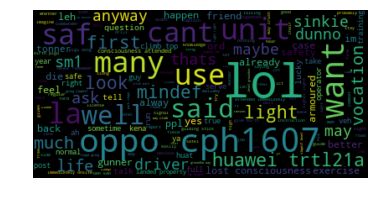

In [14]:
#Extract the 300 most positive sentiments to create a wordcloud 
pos_sen.head(300).post_text.to_csv("positivesen.csv",index=False)

import os
from os import path
from wordcloud import WordCloud


# Generate a word cloud image
wordcloud = WordCloud().generate(open("positivesen.csv").read())

# Display the generated image using matplotlib
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

The positive sentiment wordcloud does not really tell us much

C:\Users\weiji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


(-0.5, 399.5, 199.5, -0.5)

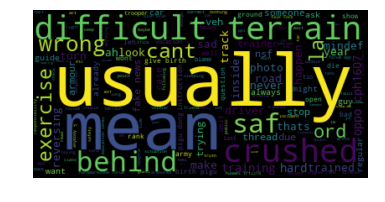

In [13]:
#Extract the 300 most negative sentiments to create a wordcloud 
neg_sen.head(300).post_text.to_csv("negativesen.csv",index=False)

# Generate a word cloud image
wordcloud = WordCloud().generate(open("negativesen.csv").read())

# Display the generated image using matplotlib
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

The negative sentiment wordcloud seems have keywords relating to the physical environment, possibly some keywords about the cause of death as well

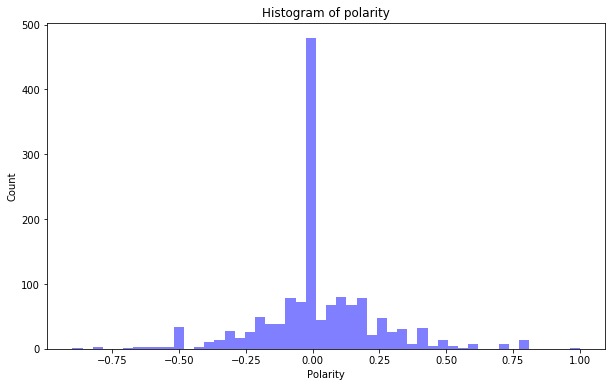

In [15]:
#plot a histogram of the polarity scores

num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df4.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

In [16]:
#examine the percentage of counts of the positive, neutral and negative sentiments in the data

df4['label'] = 0
df4.loc[df4['polarity'] > 0.0, 'label'] = 1
df4.loc[df4['polarity'] < - 0.0, 'label'] = -1

counts = df4.label.value_counts(normalize=True) * 100
print (counts)

 1    39.056088
-1    32.079343
 0    28.864569
Name: label, dtype: float64


Seems like more than 1/3 of the comments were actually positive (39%), while there were more negative comments (32%) than neutral comments (28%)

In [51]:
#merge the csvs to combine the original posttext and the cleaned posttext. 

a = pd.read_csv("C:/Users/weiji/OneDrive/Desktop/bionixsentiment/bionix2removeun.csv")
b = pd.read_csv("C:/Users/weiji/OneDrive/Desktop/bionixsentiment/bionix2datafinal.csv")

merged = pd.merge(a, b, on=['thread_url','userid','timestamp','post_number','post_id'], how = 'left')

merged.to_csv('bionix2datafinal2.csv')

In [47]:
#As vader was originally developed to analyse social media content, we could try the vader sentiment analyser on the original posttext

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [59]:
df5 = pd.read_csv("C:/Users/weiji/OneDrive/Desktop/bionixsentiment/bionix2datafinal2.csv")
df5 = df99.dropna(axis = 0, how='any', inplace=False)
df5.tail(20)


,Unnamed: 0,Unnamed: 0_x,Unnamed: 0.1_x,thread_url,userid,timestamp,post_text_x,post_number,post_id,Unnamed: 0_y,Unnamed: 0.1_y,Unnamed: 0.1.1,post_text_y,sentiment,polarity,subjectivity
1456,1456,1456,1456,https://forums.hardwarezone.com.sg/eat-drink-m...,179111,2018-11-06T12:23,There are manoeuvres that are no longer done d...,1457,117432864,1456.0,1456.0,1456.0,manoeuvre longer done due previous experience ...,"Sentiment(polarity=-0.14583333333333331, subje...",-0.145833,0.270833
1457,1457,1457,1457,https://forums.hardwarezone.com.sg/eat-drink-m...,179111,2018-11-06T12:25,Wtf is vehicular drills? Drive bionix at high ...,1458,117432881,1457.0,1457.0,1457.0,wtf vehicular drill high speed pretend buang z...,"Sentiment(polarity=-0.16999999999999998, subje...",-0.170000,0.770000
1458,1458,1458,1458,https://forums.hardwarezone.com.sg/eat-drink-m...,179111,2018-11-06T12:30,Why he no immediately try to siam. If I see a ...,1459,117432926,1458.0,1458.0,1458.0,immediately try siam coming car jump run gear ...,"Sentiment(polarity=-0.04583333333333334, subje...",-0.045833,0.570833
1459,1459,1459,1459,https://forums.hardwarezone.com.sg/eat-drink-m...,370175,2018-11-06T01:50,Dunno y wanna talk abt sit left or right See t...,1460,117433470,1459.0,1459.0,1459.0,dunno wanna talk abt sit left right damage sit...,"Sentiment(polarity=0.14285714285714285, subjec...",0.142857,0.267857
1460,1460,1460,1460,https://forums.hardwarezone.com.sg/eat-drink-m...,667242,2018-11-06T01:57,This bionix also 20 years old,1461,117433499,1460.0,1460.0,1460.0,20 year old,"Sentiment(polarity=0.1, subjectivity=0.2)",0.100000,0.200000
1461,1461,1461,1461,https://forums.hardwarezone.com.sg/eat-drink-m...,226100,2018-11-06T02:03,This guy was crushed under the Bionix..How con...,1462,117433530,1461.0,1461.0,1461.0,guy crushed bionixhow cone unconscious siah,"Sentiment(polarity=-0.1, subjectivity=0.1)",-0.100000,0.100000
1462,1462,1462,1462,https://forums.hardwarezone.com.sg/eat-drink-m...,91618,2018-11-06T02:24,So it 42 sar who had that incident...,1463,117433612,1462.0,1462.0,1462.0,42 sar incident,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000
1463,1463,1463,1463,https://forums.hardwarezone.com.sg/eat-drink-m...,357061,2018-11-06T02:25,Mila Azul wrote:,1464,117433620,1463.0,1463.0,1463.0,wrote,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000
1464,1464,1464,1464,https://forums.hardwarezone.com.sg/eat-drink-m...,631433,2018-11-06T02:28,This guy was crushed under the Bionix..How con...,1465,117433633,1464.0,1464.0,1464.0,guy crushed bionixhow cone unconscious siah ma...,"Sentiment(polarity=-0.1, subjectivity=0.1)",-0.100000,0.100000
1465,1465,1465,1465,https://forums.hardwarezone.com.sg/eat-drink-m...,722621,2018-11-06T02:39,Lepak chiu also duno? Chiu zeh zeh or ft never...,1466,117433672,1465.0,1465.0,1465.0,lepak chiu duno chiu zeh zeh ft never zeh zeh,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000


In [60]:
scores =[]
sentences = df5['post_text_x']

for sentence in sentences:
    score = analyser.polarity_scores(sentence)
    scores.append(score)


In [61]:
df6 = pd.DataFrame(scores)
df6.tail(20)

,compound,neg,neu,pos
1442,-0.2023,0.140,0.779,0.081
1443,-0.6767,0.148,0.852,0.000
1444,0.6887,0.064,0.752,0.184
1445,-0.7579,0.134,0.835,0.031
1446,0.0000,0.000,1.000,0.000
1447,-0.5684,0.220,0.780,0.000
1448,0.0000,0.000,1.000,0.000
1449,0.0000,0.000,1.000,0.000
1450,-0.6713,0.101,0.899,0.000
1451,0.0000,0.000,1.000,0.000


In [62]:
#Get mean score for the positive, negative and neutral (i.e., the strength of each category)

df6.mean()

compound   -0.088037
neg         0.093347
neu         0.837254
pos         0.069389
dtype: float64

In [63]:
df7 = pd.concat([df5, df6], axis=1)
df7 [['timestamp','post_text_x', 'post_text_y','compound', 'neg', 'neu', 'pos','polarity','subjectivity']].head(20)
df7.to_csv('bionixdatafinalwithvader.csv')

-1    46.476965
 1    34.552846
 0    18.970190
Name: label, dtype: float64


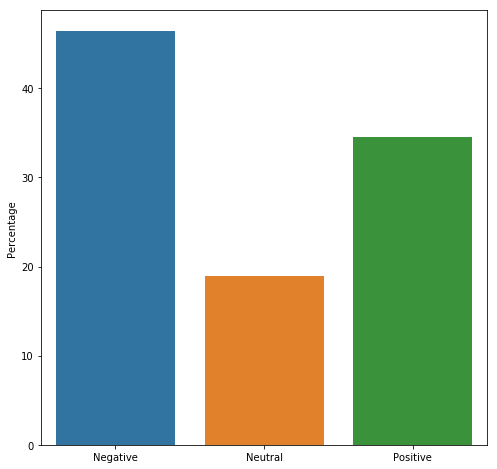

In [93]:
#get percentages of positive, negative and neutral comments
df7['label'] = 0
df7.loc[df7['compound'] > 0.0, 'label'] = 1
df7.loc[df7['compound'] < - 0.0, 'label'] = -1
df7.head()

fig, ax = plt.subplots(figsize=(8, 8))

counts = df7.label.value_counts(normalize=True) * 100
print (counts)

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

results of vader seem to be slightly different, where most of the comments were negative (46%), followed by positive (34%) and then neutral (18%)

# Topic Modelling for the data

In [76]:
import spacy
import gensim
import pyLDAvis
import random

In [78]:
#Create function to return list of tokens
spacy.load('en')
from spacy.lang.en import English
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [79]:
#Create lemmatizer function
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\weiji\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [80]:

#Filter out stopwords
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\weiji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [84]:
datafile = 'C:/Users/weiji/OneDrive/Desktop/bionixsentiment/bionixdatafinalwithvader.csv'

text_data = []


with open(datafile, 'r') as csvfile:
    rows = csv.reader (csvfile)

    for row in rows:
        post_text_x = row[7]
        tokens = prepare_text_for_lda(post_text_x)
        if random.random() > .99:
            print(tokens)
            text_data.append(tokens)
        
df2 = pd.DataFrame(text_data, columns = ['post_text_x'])

df2.head(10)

['.............']
['quote', 'first', 'mindef', 'cover']
['rover', 'don\\u2019', 'closer', 'almost', 'middle']
['slope', 'beside', 'confirm', 'reverse', 'slope', 'rover', 'huawei', 'using']
['basic', 'driving', 'vehicle', 'circumstances', 'accident', 'special', 'accident', 'happen', 'rough', 'uneven', 'terrain', 'nothing', 'except', 'victim', 'accident', 'happen', 'stretch', 'happen', 'driver', 'competent', 'mention', 'drive', 'person', 'expect', 'proper', 'guidance', 'harry', 'infantry', 'people', 'training', 'driving', 'armour']
['sgidiots', 'junior', 'member', 'post', 'stupidity', 'remember', 'password', 'bodoh', 'thanks', 'click', 'profile']
['disclaimer', 'armor', 'train', 'take', 'accident', 'track', 'ground', 'seem', 'belong', 'right', 'track', 'appear', 'park', 'move', 'along', 'right', 'slight', 'seem', 'reverse', 'possibly', '3-point', 'point', 'locking', 'track', 'rotate', 'attack', 'samsung', 'g955f', 'using']
['cent', 'SCREEN_NAME', 'tankgunner', 'remember', 'things', 'dire

AssertionError: 1 columns passed, passed data had 37 columns

In [85]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)

In [86]:
corpus = [dictionary.doc2bow(text) for text in text_data]

In [87]:
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [88]:
#try 5 topics 

import gensim
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')

In [89]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.036*"remember" + 0.036*"instructor" + 0.025*"using" + 0.025*"medic"')
(1, '0.036*"rover" + 0.035*"almost" + 0.035*"middle" + 0.035*"closer"')
(2, '0.035*"mindef" + 0.035*"quote" + 0.035*"first" + 0.035*"cover"')
(3, '0.045*"track" + 0.031*"smell" + 0.031*"right" + 0.031*"seem"')
(4, '0.033*"accident" + 0.033*"happen" + 0.022*"crush" + 0.022*"slope"')


using LDA, seems like the topics were about speculation of how the accident unfolded

In [90]:
#try 10 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word=dictionary, passes=15)
ldamodel.save('model10.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.057*"mindef" + 0.057*"quote" + 0.057*"cover" + 0.057*"first"')
(1, '0.055*"slope" + 0.055*"rover" + 0.029*"post" + 0.029*"password"')
(2, '0.086*"medic" + 0.045*"mindef" + 0.045*"dunno" + 0.045*"crush"')
(3, '0.077*"smell" + 0.040*"force" + 0.040*"might" + 0.040*"friend"')
(4, '0.007*"instructor" + 0.007*"remember" + 0.007*"tankgunner" + 0.007*"periscope"')
(5, '0.060*"track" + 0.041*"climb" + 0.041*"right" + 0.041*"seem"')
(6, '0.042*"remember" + 0.042*"instructor" + 0.028*"attend" + 0.028*"medic"')
(7, '0.067*"accident" + 0.067*"happen" + 0.045*"driving" + 0.024*"expect"')
(8, '0.007*"instructor" + 0.007*"remember" + 0.007*"tankgunner" + 0.007*"g8141"')
(9, '0.007*"track" + 0.007*"seem" + 0.007*"right" + 0.007*"almost"')


In [91]:
#visualise the themes - 5 themes

dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')


In [92]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

C:\Users\weiji\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
